<a href="https://colab.research.google.com/github/ericbonelli/Cientista-de-Dados_EBAC/blob/main/Profissao_Cientista_de_Dados_M11_assignment01_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('//content/drive/MyDrive/Especialização em IA/Cientista de Dados - Ebac/Desenvolvimento de aplicações com Python/Árvores II (Parte I: árvore de regressão)/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [5]:
#Verificar dados faltantes e nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Temos 207 dados faltantes de Bedroons, representando 1% da amostra, deste modo vamos eliminar esses dados.

In [6]:
# eliminar as colunas com dados faltantes
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
#Verificar dados duplicados
data.duplicated().sum()
print(f'A base possui {data.duplicated().sum()} dados duplicados')

A base possui 0 dados duplicados


In [8]:
# Análise descritiva das variáveis
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# Transformar a variável "ocean_proximity" em Dummmy
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

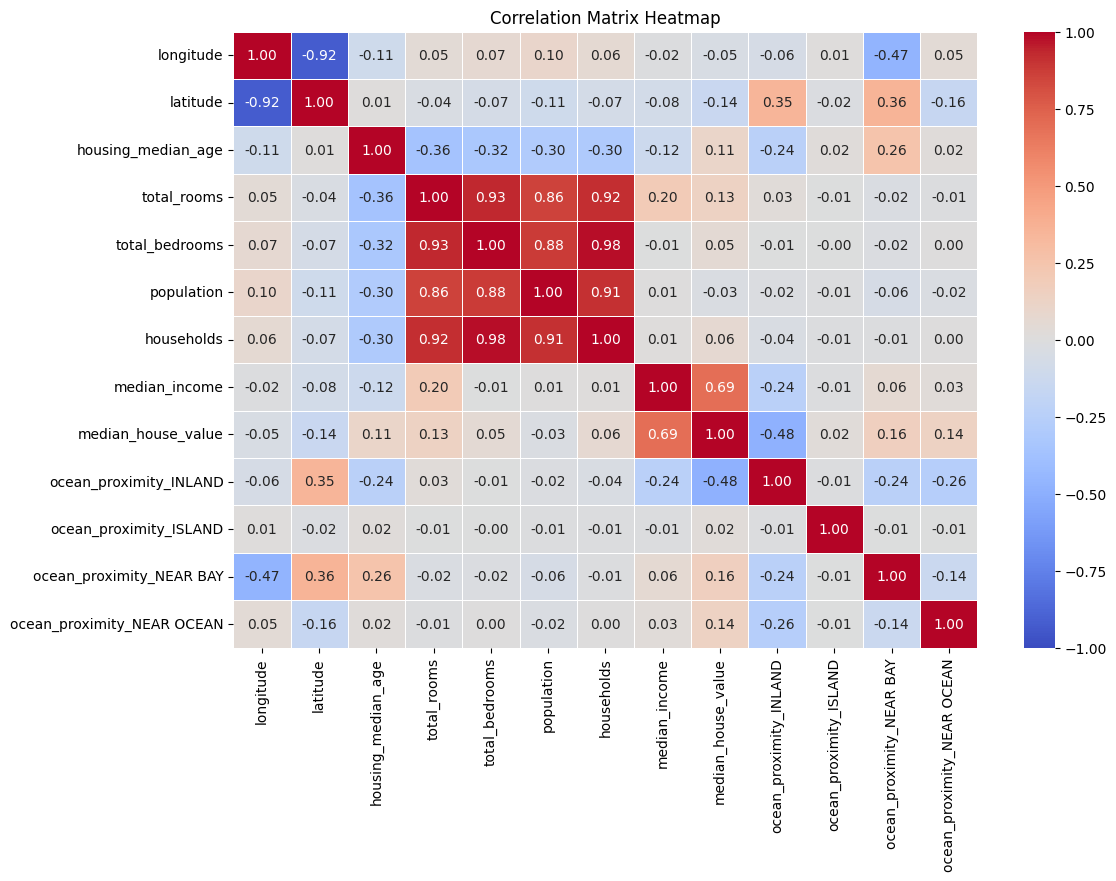

In [10]:
# Vizualizar a Matriz de correlação
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
# Vizualizar dados com a variável dependente
target_correlation = correlation_matrix['median_house_value'].sort_values(ascending=False)
target_correlation

,median_house_value
median_house_value,1.000000
median_income,0.688355
ocean_proximity_NEAR BAY,0.160526
ocean_proximity_NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ocean_proximity_ISLAND,0.023525
population,-0.025300


Vamos retirar as váriaveis com menor correlação

In [12]:
# Dataframe apenas com as variáveis com corralação acima de 0,1
data_select_corr = data[['median_house_value', 'median_income', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN', 'total_rooms', 'ocean_proximity_INLAND']] # Use square brackets to select columns
data_select_corr.head()

,median_house_value,median_income,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,total_rooms,ocean_proximity_INLAND
0,452600.0,8.3252,True,False,880.0,False
1,358500.0,8.3014,True,False,7099.0,False
2,352100.0,7.2574,True,False,1467.0,False
3,341300.0,5.6431,True,False,1274.0,False
4,342200.0,3.8462,True,False,1627.0,False


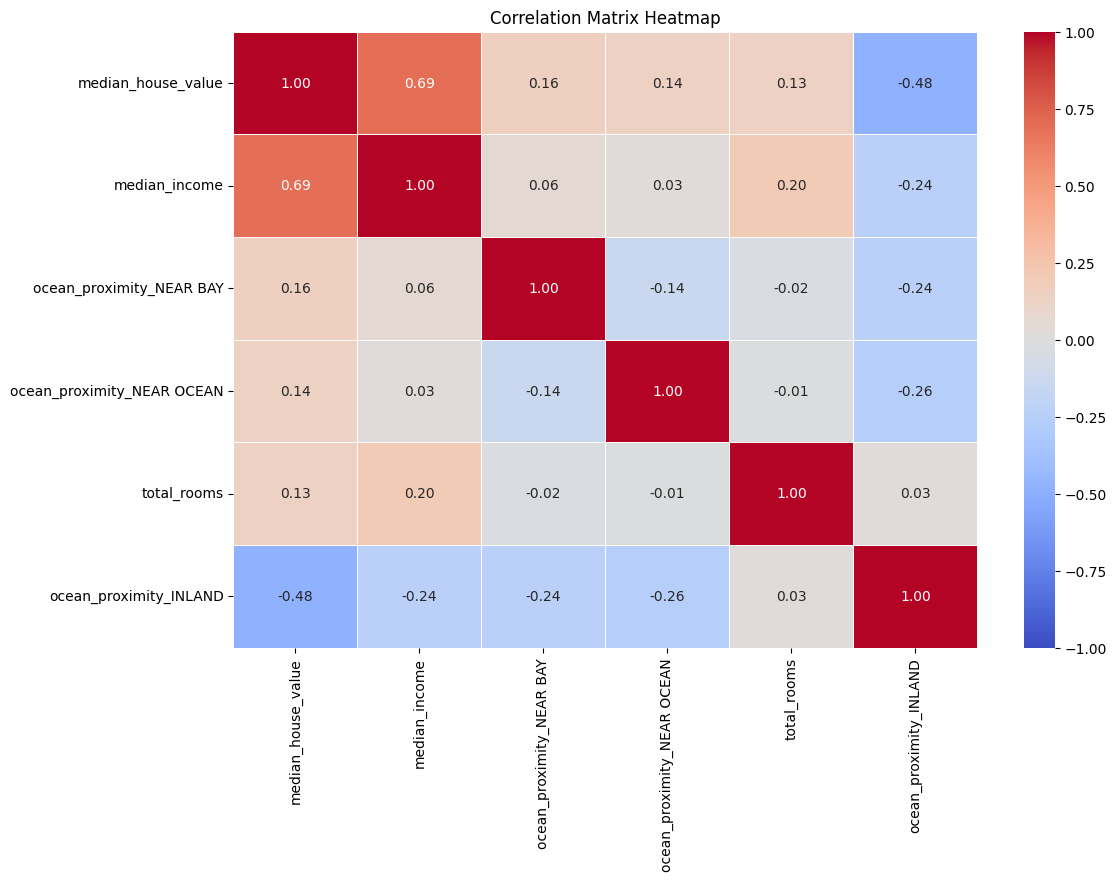

In [13]:
# Vizualizar a Matriz de correlação com as variáveis selecionadas
correlation_matrix = data_select_corr.corr()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 3. Separe os dados em validação e teste

In [14]:
# Separe os dados em validação e teste
X = data_select_corr.drop('median_house_value', axis=1)
y = data_select_corr['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14303, 5), (6130, 5), (14303,), (6130,))

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [15]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [16]:
# mean_squared_error calcular do regr1 e reg2 para TREINAMENTO
mse1 = mean_squared_error(y_train, regr_1.predict(X_train))
mse2 = mean_squared_error(y_train, regr_2.predict(X_train))

template = "O MSE da árvore para TREINAMENTO com profundidade={0} é: {1:.2f}"
print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore para TREINAMENTO com profundidade=2 é: 6718783701,32
O MSE da árvore para TREINAMENTO com profundidade=8 é: 4690140268,21


In [17]:
# mean_squared_error calcular do regr1 e reg2 para TESTE
mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse2 = mean_squared_error(y_test, regr_2.predict(X_test))

template = "O MSE da árvore para TESTE com profundidade={0} é: {1:.2f}"
print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore para TESTE com profundidade=2 é: 6852925251,42
O MSE da árvore para TESTE com profundidade=8 é: 5653908159,24


In [18]:
r2_1 = regr_1.score(X_train, y_train)
r2_2 = regr_2.score(X_train, y_train)

template = "O R2 da árvore para TREINAMENTO com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),r2_1).replace(".",","))
print(template.format(regr_2.get_depth(),r2_2).replace(".",","))

O R2 da árvore para TREINAMENTO com profundidade=2 é: 0,49
O R2 da árvore para TREINAMENTO com profundidade=8 é: 0,65


In [19]:
r2_1 = regr_1.score(X_test, y_test)
r2_2 = regr_2.score(X_test, y_test)

template = "O R2 da árvore para TESTES com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),r2_1).replace(".",","))
print(template.format(regr_2.get_depth(),r2_2).replace(".",","))

O R2 da árvore para TESTES com profundidade=2 é: 0,49
O R2 da árvore para TESTES com profundidade=8 é: 0,58


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

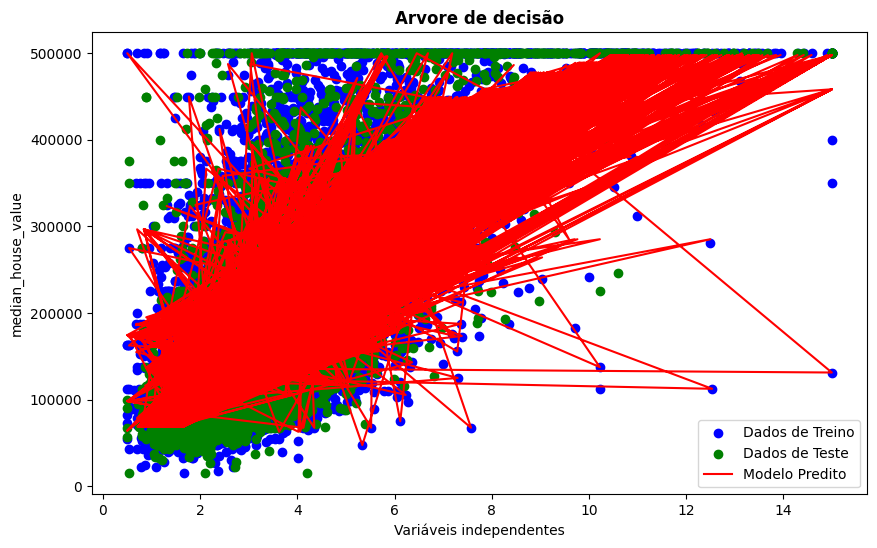

In [20]:
# Arvore com deph-8
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], y_train, color='blue', label='Dados de Treino')
plt.scatter(X_test.iloc[:, 0], y_test, color='green', label='Dados de Teste')
y_train_pred = regr_2.predict(X_train)
plt.plot(X_train.iloc[:, 0], y_train_pred, color='red', label='Modelo Predito')
plt.xlabel('Variáveis independentes')
plt.ylabel('median_house_value')
plt.title('Arvore de decisão', fontweight='bold')
plt.legend()
plt.show()

***A arvore com Deph = 8***

**Análise:**
Diferença entre treinamento e teste:
A diferença de MSE entre os conjuntos de treinamento e teste é relativamente pequena. Isso indica que a árvore com profundidade máxima = 8 não está sofrendo de overfitting significativo. O modelo generaliza bem para dados fora do treinamento.

**Erro no teste:**
O MSE no teste é maior que no treinamento, o que é esperado, pois o modelo foi ajustado nos dados de treinamento e está sendo avaliado em novos dados.

**Conclusão:**
A profundidade máxima de 8 parece ser uma boa escolha, equilibrando o desempenho nos dois conjuntos.
Embora o erro absoluto ainda seja alto, o modelo com profundidade limitada está generalizando de forma razoável. Talvez seja necessário ajustes adicionais como incluir mais dados ou explorar hiperparâmetros, podem melhorar o desempenho.

**Abaixo utlizamos GridSearchCV para econtrar os melhores paramentros:**

In [21]:
# GridSearchCV para os tres parametros 'max_depth', 'min_samples_split', 'min_samples_leaf
from sklearn.model_selection import GridSearchCV


param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 10, 20],
              'min_samples_leaf': [1, 5, 10]
              }
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params


{'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [22]:
regr_3 = DecisionTreeRegressor(max_depth=6, min_samples_leaf=15, min_samples_split=3)
regr_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=15, min_samples_split=3)

In [23]:
# calcular mse para reg3 para treinamento
mse3 = mean_squared_error(y_train, regr_3.predict(X_train))

template = "O MSE da árvore para TREINAMENTO com profundidade={0} é: {1:.2f}"
print(template.format(regr_3.get_depth(),mse3).replace(".",","))

O MSE da árvore para TREINAMENTO com profundidade=6 é: 5080688990,28


In [24]:
# calcular mse para reg3 para teste
mse3 = mean_squared_error(y_test, regr_3.predict(X_test))

template = "O MSE da árvore para TESTE com profundidade={0} é: {1:.2f}"
print(template.format(regr_3.get_depth(),mse3).replace(".",","))

O MSE da árvore para TESTE com profundidade=6 é: 5476344338,69


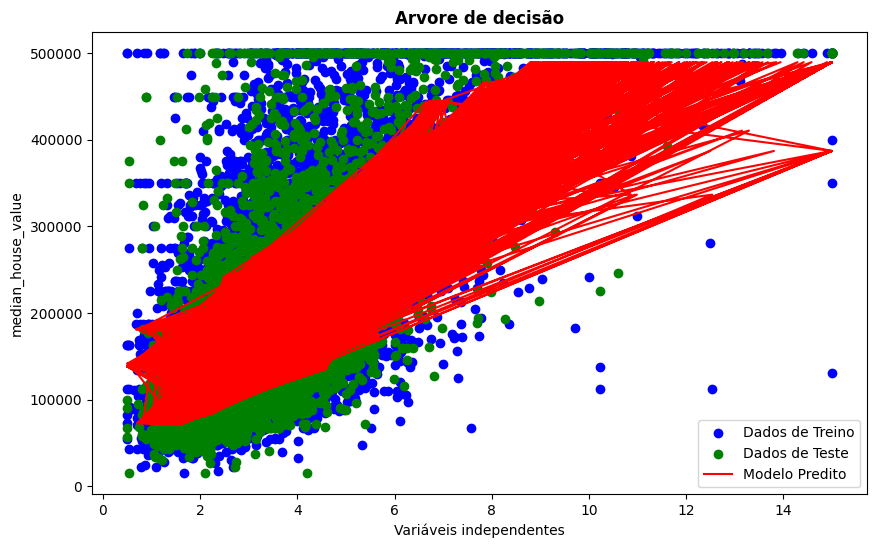

In [25]:
# Arvore com deph-6
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], y_train, color='blue', label='Dados de Treino')
plt.scatter(X_test.iloc[:, 0], y_test, color='green', label='Dados de Teste')
y_train_pred = regr_3.predict(X_train)
plt.plot(X_train.iloc[:, 0], y_train_pred, color='red', label='Modelo Predito')
plt.xlabel('Variáveis independentes')
plt.ylabel('median_house_value')
plt.title('Arvore de decisão', fontweight='bold')
plt.legend()
plt.show()

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

**Renda média me parece ser a variavel mais importante da árvore**

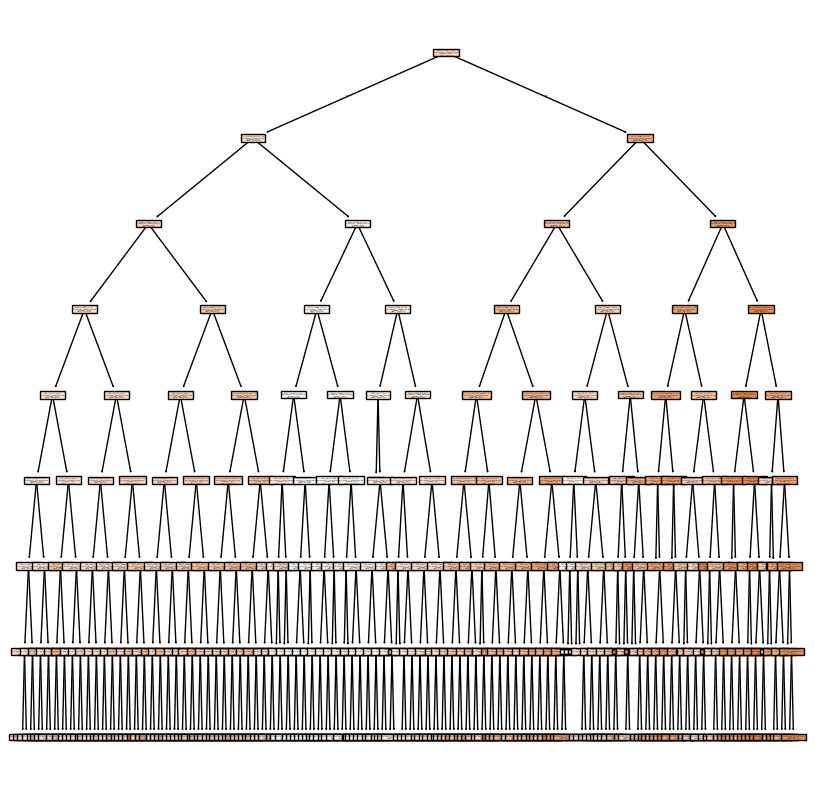

In [26]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_2,
                    feature_names=X.columns,
                    filled=True)

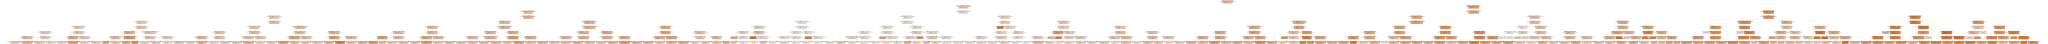

In [27]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(regr_2, out_file=None,
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph